<a href="https://colab.research.google.com/github/jeno1990/Colab-Projects/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Collection and Pre Processing

DATASET LINK (GOOGLE DRIVE): https://drive.google.com/drive/folders/19LS_bEokRTWYnxLlL3-0iwnuixFkZIP8?usp=drive_link

DATASET LINK (KAGGLE): https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data

## 1.1 Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from scipy.stats import zscore

## 1.2 Dataset Import

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
harDataset = pd.read_csv('/content/gdrive/MyDrive/COMP-5011/Human Activity Recognition/harDataset.csv')

Mounted at /content/gdrive


## 1.3 Dataset Description

In [ ]:
harDataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
harDataset.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [ ]:
harDataset.shape

(10299, 563)

## 1.4 Duplicates and Null Values

In [ ]:
print('Duplicates in dataset: {}'.format(sum(harDataset.duplicated())))
print('Null values in dataset: {}'.format(harDataset.isnull().values.sum()))

Duplicates in dataset: 0
Null values in dataset: 0


## 1.5 Imbalance

<ipython-input-7-a98f80ce10a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(x="Activity", data=harDataset, palette=custom_palette)


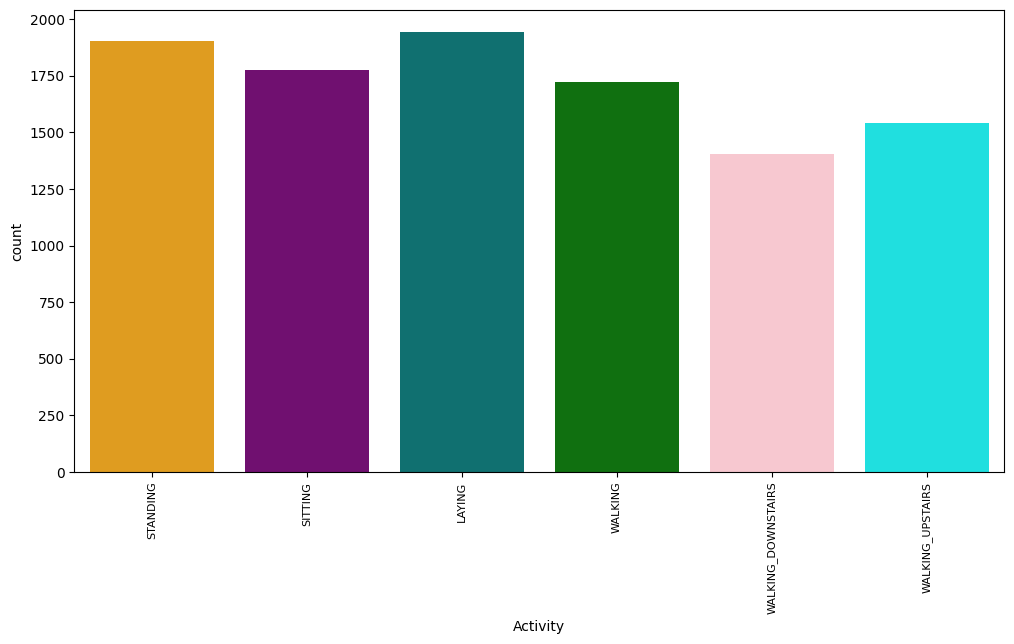

In [ ]:
custom_palette = {
    'WALKING': 'green',
    'WALKING_UPSTAIRS': 'cyan',
    'WALKING_DOWNSTAIRS': 'pink',
    'SITTING': 'purple',
    'STANDING': 'orange',
    'LAYING': 'teal'
}

plt.figure(figsize=(12,6))
axis = sns.countplot(x="Activity", data=harDataset, palette=custom_palette)
plt.xticks(rotation='vertical', size=8)
plt.show()

## 1.6 Visualization of Activity Distribution in Percentiles

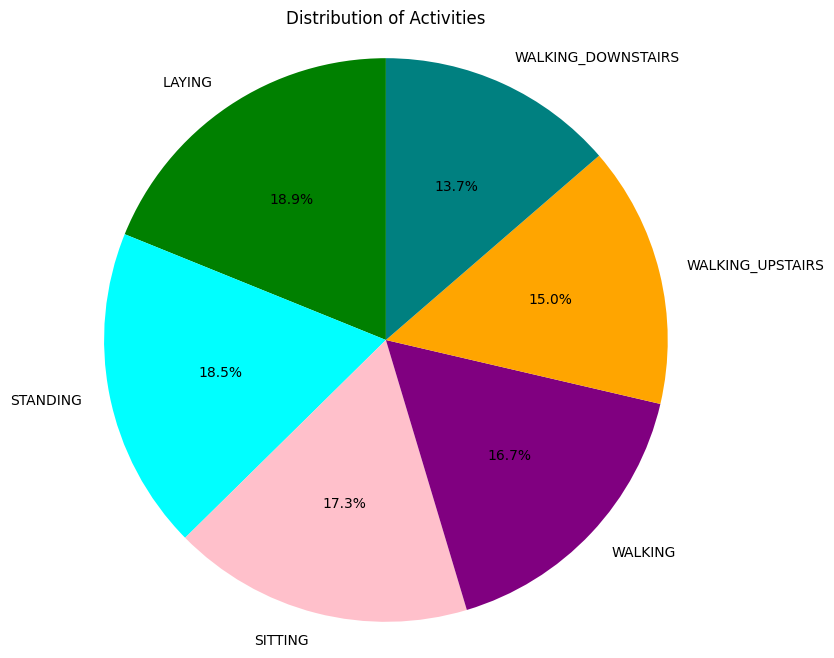

In [ ]:
activity_percentiles = harDataset['Activity'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(activity_percentiles, labels=activity_percentiles.index, autopct='%1.1f%%', startangle=90, colors=list(custom_palette.values()))
plt.title('Distribution of Activities')
plt.axis('equal')
plt.show()

## 1.7 3D PCA Visualization of Activities by Principal Components

In [ ]:
color_map = {
    'LAYING': 'red',
    'STANDING': 'blue',
    'SITTING': 'green',
    'WALKING': 'purple',
    'WALKING_UPSTAIRS': 'orange',
    'WALKING_DOWNSTAIRS': 'cyan'
}


X = harDataset.drop('Activity', axis=1)
y = harDataset['Activity']

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(3)])

pca_df['Activity'] = y

pca_df.head()

# Creating the 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC_1',
    y='PC_2',
    z='PC_3',
    color='Activity',
    color_discrete_map=color_map,
    title='PCA Visualization of Activities',
    labels={'PC_1': 'Principal Component 1',
            'PC_2': 'Principal Component 2',
            'PC_3': 'Principal Component 3'}
)

fig.update_layout(
    scene = dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    ),
    legend_title='Activity'
)

fig.show()

## 1.8 Lable Encoding

In [ ]:
le = LabelEncoder()
harDataset['Activity'] = le.fit_transform(harDataset['Activity'])
activity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Activity mapping:", activity_mapping)

Activity mapping: {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


## 1.9 Corelation Heatmap of Top 10 Features

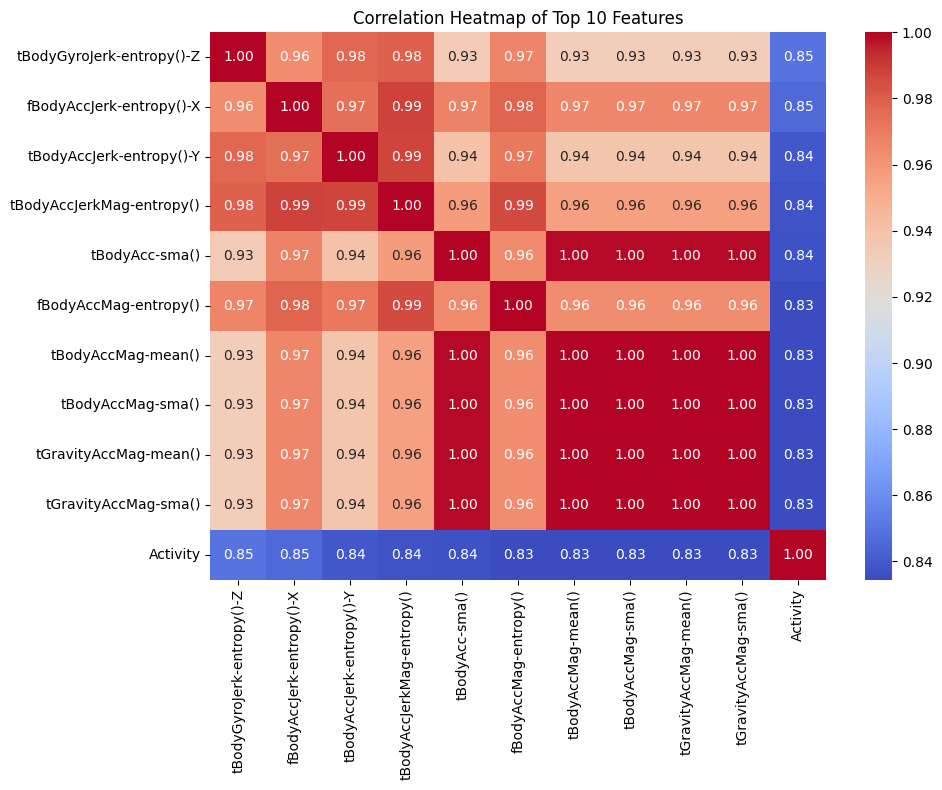

In [ ]:
correlations = harDataset.corr()['Activity'].abs().sort_values(ascending=False)
top_features = correlations[1:11].index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(harDataset[top_features + ['Activity']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 10 Features')
plt.tight_layout()
plt.show()

## 1.10 Outlier Detection with PCA

In [ ]:
pca = PCA(n_components= 29)
reduced_data = pca.fit_transform(harDataset.iloc[:, :-3])
z_scores_pca = np.abs(zscore(reduced_data))
outliers_pca = (z_scores_pca > 3).any(axis=1)
harDataset['PCA_Outlier'] = outliers_pca
print(harDataset['PCA_Outlier'].value_counts())
harDataset.head()

PCA_Outlier
False    9126
True     1173
Name: count, dtype: int64


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,PCA_Outlier
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2,False
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2,False
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2,False
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2,False
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2,False


## 1.11 Visualization of The Outliers in 2d Plane

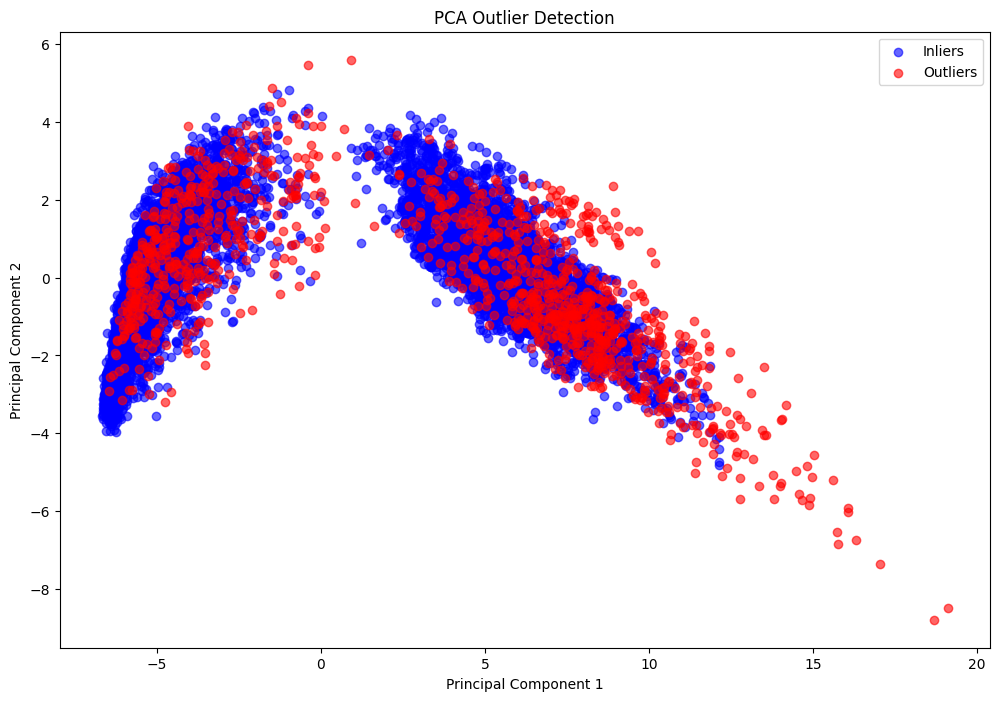

In [ ]:
harDataset['PCA_1'] = reduced_data[:, 0]
harDataset['PCA_2'] = reduced_data[:, 1]

plt.figure(figsize=(12, 8))
plt.scatter(
    harDataset.loc[~harDataset['PCA_Outlier'], 'PCA_1'],
    harDataset.loc[~harDataset['PCA_Outlier'], 'PCA_2'],
    color='blue', label='Inliers', alpha=0.6
)
plt.scatter(
    harDataset.loc[harDataset['PCA_Outlier'], 'PCA_1'],
    harDataset.loc[harDataset['PCA_Outlier'], 'PCA_2'],
    color='red', label='Outliers', alpha=0.6
)
harDataset.drop('PCA_Outlier', axis=1, inplace=True)
harDataset.drop('PCA_1', axis=1, inplace=True)
harDataset.drop('PCA_2', axis=1, inplace=True)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Outlier Detection')
plt.legend()
plt.show()

# 2. Feature Engineering and Selection

## 2.1 Determining Optimal Principal Components to Retain Best Variance

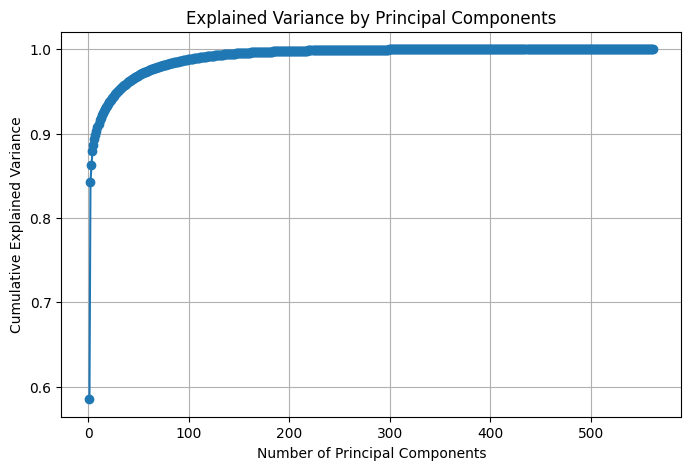

Number of components to retain 95% variance: 29


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,Activity
0,-14.516791,-7.040348,0.848517,1.311452,-1.918762,-0.754556,0.576247,-0.192814,0.673816,-1.212133,...,-0.078554,0.424375,0.476503,-0.496417,0.103025,0.315891,0.767794,0.385277,0.870693,2
1,-14.512251,-7.066135,0.714288,1.728410,-0.957263,-0.503252,-0.936521,-0.066616,-0.860003,-0.824904,...,-0.074631,0.143033,-0.541779,0.051106,-0.086291,0.097132,0.440175,-0.152991,-0.277432,2
2,-14.521702,-7.002312,0.434467,2.051527,-0.740811,0.106743,0.095229,-0.016855,-0.017005,-0.098009,...,0.067551,0.263619,-0.849928,-0.066437,-0.226349,0.109345,-0.183628,0.331113,-0.018467,2
3,-14.499971,-7.202094,-0.218497,2.058371,-0.477533,-0.697812,-0.861611,-0.692418,-0.506246,0.514871,...,0.239330,-0.217249,0.026504,0.171180,0.490321,-0.219587,0.055055,0.073012,0.263204,2
4,-14.491649,-7.270128,-0.422661,2.277227,-0.468014,-0.357469,-0.282462,-0.252537,-0.094981,0.543678,...,0.365778,-0.164534,0.094855,-0.008105,0.344132,0.482475,-0.351103,-0.253227,-0.280327,2


In [ ]:
X = harDataset.drop('Activity', axis=1)
y = harDataset['Activity']

pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()
n_components = next(i for i, cumulative_var in enumerate(explained_variance) if cumulative_var >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Creating a DataFrame with the reduced data
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(n_components)])
pca_df['Activity'] = y
pca_df.head()

## 2.2 Dimentionality Reduction with PCA

In [ ]:
# Choosing 29 PCA components
pca = PCA(n_components = 29)
X_pca = pca.fit_transform(X)
X_pca.shape
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])

pca_df['Activity'] = y
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,Activity
0,-14.516791,-7.040348,0.848517,1.311452,-1.918762,-0.754556,0.576247,-0.192814,0.673816,-1.212133,...,-0.078554,0.424375,0.476503,-0.496417,0.103025,0.315891,0.767794,0.385277,0.870693,2
1,-14.512251,-7.066135,0.714288,1.728410,-0.957263,-0.503252,-0.936521,-0.066616,-0.860003,-0.824904,...,-0.074631,0.143033,-0.541779,0.051106,-0.086291,0.097132,0.440175,-0.152991,-0.277432,2
2,-14.521702,-7.002312,0.434467,2.051527,-0.740811,0.106743,0.095229,-0.016855,-0.017005,-0.098009,...,0.067551,0.263619,-0.849928,-0.066437,-0.226349,0.109345,-0.183628,0.331113,-0.018467,2
3,-14.499971,-7.202094,-0.218497,2.058371,-0.477533,-0.697812,-0.861611,-0.692418,-0.506246,0.514871,...,0.239330,-0.217249,0.026504,0.171180,0.490321,-0.219587,0.055055,0.073012,0.263204,2
4,-14.491649,-7.270128,-0.422661,2.277227,-0.468014,-0.357469,-0.282462,-0.252537,-0.094981,0.543678,...,0.365778,-0.164534,0.094855,-0.008105,0.344132,0.482475,-0.351103,-0.253227,-0.280327,2


# 3. Model Selection and Training

## 3.1 Test and Train Split

In [ ]:
X = harDataset.drop('Activity', axis=1)
X = X.drop('subject', axis=1)
y = harDataset['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.2 SVM

In [ ]:
# SVM classifier
svm_classifier = SVC(kernel='rbf', C=100)
svm_classifier.fit(X_train, y_train)

# Prediction
y_train_pred = svm_classifier .predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"SVM Training Accuracy: {train_accuracy}")

SVM_y_pred = svm_classifier .predict(X_test)
test_accuracy = accuracy_score(y_test, SVM_y_pred)
print(f"SVM Testing Accuracy: {test_accuracy}")

train_error_rate = 1 - train_accuracy
print(f"SVM Training Error Rate: {train_error_rate}")

SVM Training Accuracy: 0.9995145041874014
SVM Testing Accuracy: 0.9932038834951457
SVM Training Error Rate: 0.00048549581259860197


## 3.3 SVM-PCA

In [ ]:
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=42)

# SVM classifier
svm_classifier = SVC(kernel='rbf', C=100)
svm_classifier.fit(X_train_pca, y_train_pca)

# Prediction
y_val_pred_pca = svm_classifier.predict(X_val_pca)
val_accuracy = accuracy_score(y_val_pca, y_val_pred_pca)
print(f"Validation Accuracy of the SVM model: {val_accuracy}")
y_pred_pca = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca, y_pred_pca)
print(f"Test Accuracy of the SVM model: {accuracy}")

Validation Accuracy of the SVM model: 0.9870550161812298
Test Accuracy of the SVM model: 0.9896440129449838


## 3.4 Decision Tree

In [ ]:
# Initializing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
dt_classifier.fit(X_train, y_train)

# Prediction
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Decision Tree Training Accuracy: {train_accuracy}")

decision_tree_y_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, decision_tree_y_pred)
print(f"Decision Tree Testing Accuracy: {test_accuracy}")

train_error_rate = 1 - train_accuracy
print(f"Decision Tree Training Error Rate: {train_error_rate}")

Decision Tree Training Accuracy: 0.9798519237771575
Decision Tree Testing Accuracy: 0.941747572815534
Decision Tree Training Error Rate: 0.020148076222842537


## 3.5 Logistic Regression

In [ ]:
# Initializing Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000, l1_ratio=.5)
logreg_classifier.fit(X_train, y_train)

# Prediction
y_train_pred = logreg_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Logistic Regression Training Accuracy: {train_accuracy}")

logistic_reg_y_pred = logreg_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, logistic_reg_y_pred)
print(f"Logistic Regression Testing Accuracy: {test_accuracy}")

train_error_rate = 1 - train_accuracy
print(f"Logistic Regression Training Error Rate: {train_error_rate}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)



Logistic Regression Training Accuracy: 0.9911397014200752
Logistic Regression Testing Accuracy: 0.9844660194174757
Logistic Regression Training Error Rate: 0.008860298579924764


## 3.6 Random Forest

In [ ]:
# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(min_samples_leaf=10, bootstrap=False, n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prediction
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Random Forest Training Accuracy: {train_accuracy}")

random_forest_y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, random_forest_y_pred)
print(f"Random Forest Testing Accuracy: {test_accuracy}")

train_error_rate = 1 - train_accuracy
print(f"Random Forest Training Error Rate: {train_error_rate}")

Random Forest Training Accuracy: 0.9973297730307076
Random Forest Testing Accuracy: 0.9737864077669903
Random Forest Training Error Rate: 0.002670226969292422


## 3.7 XGBoost

In [ ]:
# Initializing XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=6, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Prediction
y_train_pred = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"XGBoost Training Accuracy: {train_accuracy}")

xgboost_y_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, xgboost_y_pred)
print(f"XGBoost Testing Accuracy: {test_accuracy}")

train_error_rate = 1 - train_accuracy
print(f"XGBoost Training Error Rate: {train_error_rate}")

XGBoost Training Accuracy: 1.0
XGBoost Testing Accuracy: 0.9912621359223301
XGBoost Training Error Rate: 0.0


# 4. Model Evaluation and Performance

## 4.1 Performance Metrics for Machine Learning Models

In [ ]:
models = {
    "SVM": SVM_y_pred,
    "Decision Tree": decision_tree_y_pred,
    "Logistic Regression": logistic_reg_y_pred,
    "Random Forest": random_forest_y_pred,
    "XGBoost": xgboost_y_pred
}

for model_name, y_pred in models.items():
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{model_name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

SVM:
  Precision: 0.9937
  Recall: 0.9936
  F1-score: 0.9936
Decision Tree:
  Precision: 0.9401
  Recall: 0.9390
  F1-score: 0.9395
Logistic Regression:
  Precision: 0.9848
  Recall: 0.9850
  F1-score: 0.9849
Random Forest:
  Precision: 0.9732
  Recall: 0.9733
  F1-score: 0.9732
XGBoost:
  Precision: 0.9912
  Recall: 0.9912
  F1-score: 0.9912


## 4.2 Performance Metrics for SVM-PCA Model

In [ ]:
print("PCA SVM:")
precision = precision_score(y_test_pca, y_pred_pca, average='macro')
recall = recall_score(y_test_pca, y_pred_pca, average='macro')
f1 = f1_score(y_test_pca, y_pred_pca, average='macro')
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")

PCA SVM:
  Precision: 0.9896
  Recall: 0.9899
  F1-score: 0.9898


## 4.3 Confusion Matrices for Machine Learning Models

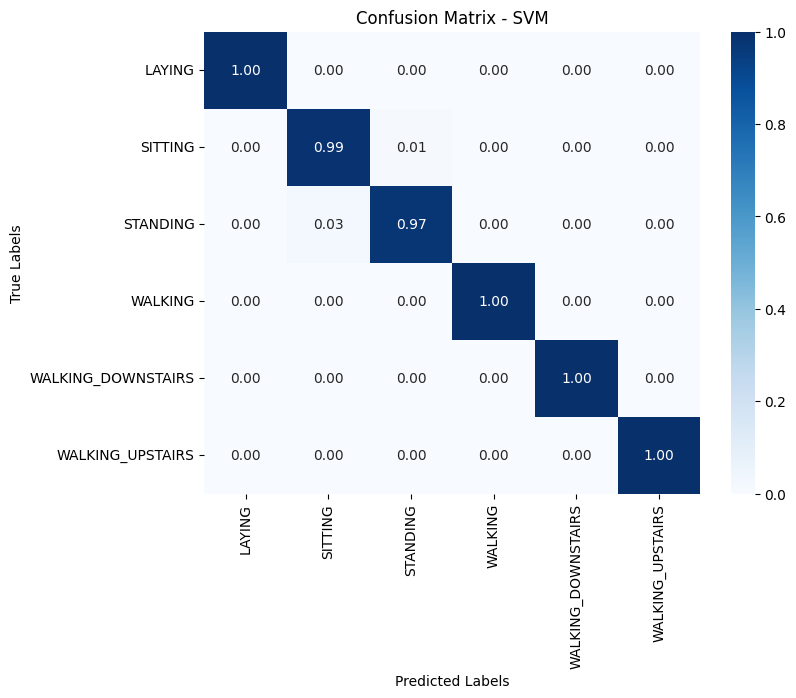

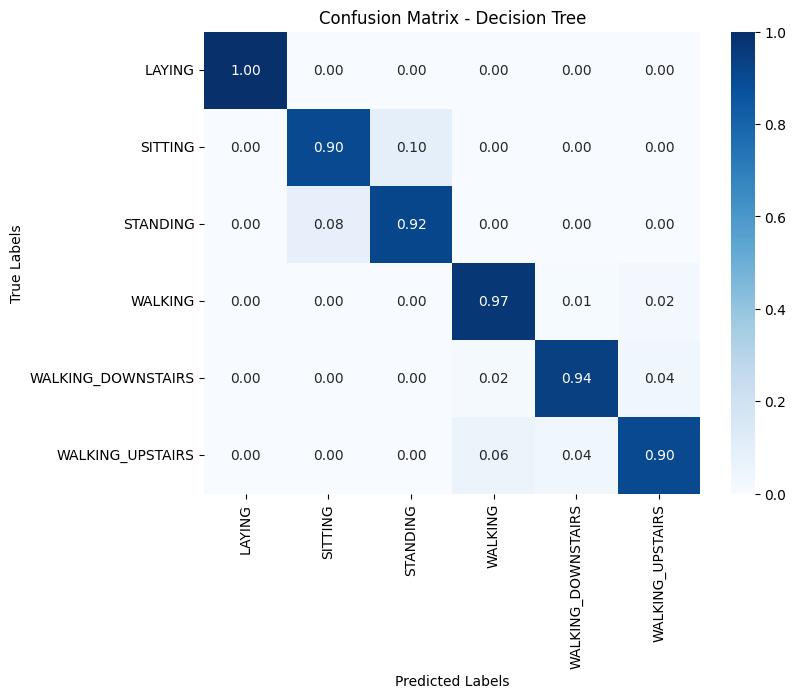

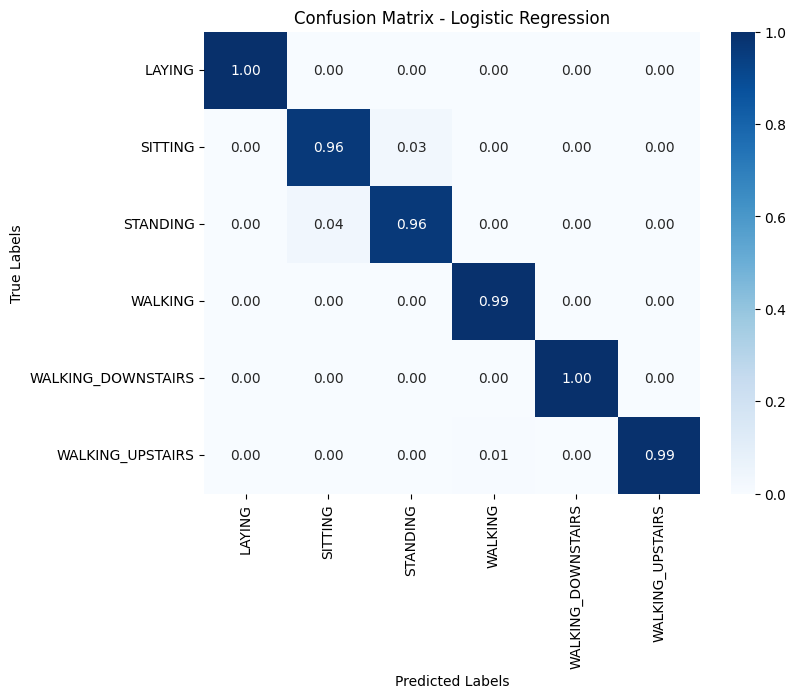

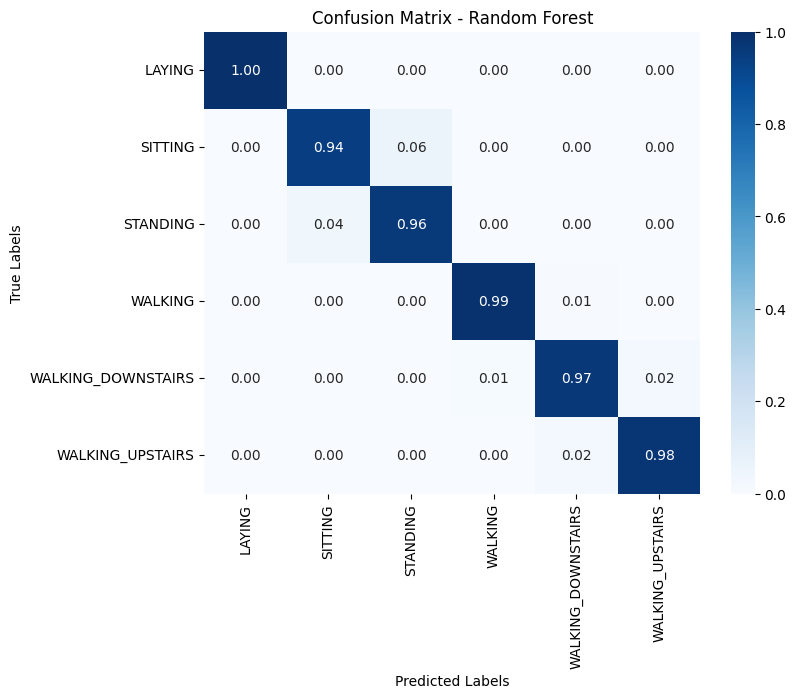

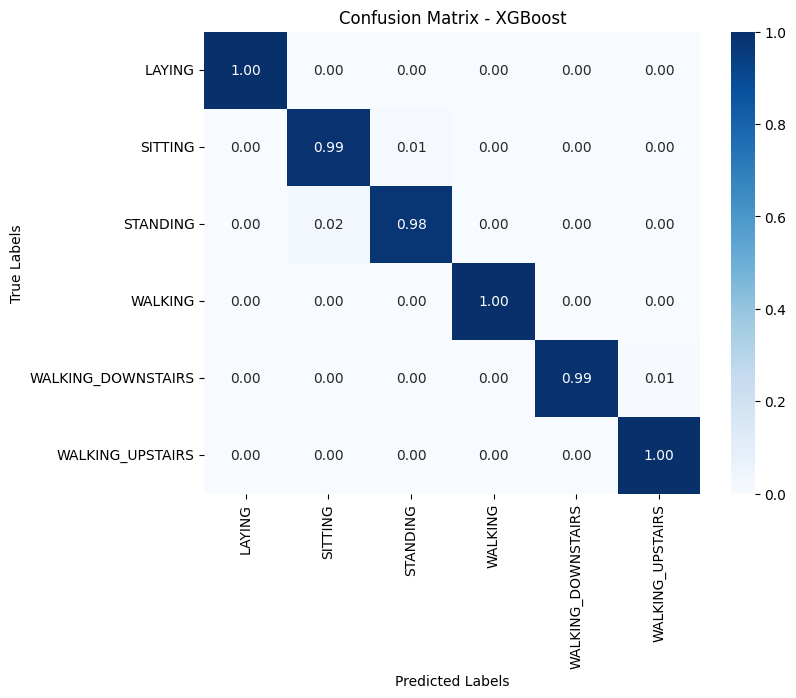

In [ ]:
models = {
    "SVM": SVM_y_pred,
    "Decision Tree": decision_tree_y_pred,
    "Logistic Regression": logistic_reg_y_pred,
    "Random Forest": random_forest_y_pred,
    "XGBoost": xgboost_y_pred,
}

for model_name, y_pred in models.items():
  cm = confusion_matrix(y_test, y_pred, normalize='true')
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
              xticklabels=le.classes_, yticklabels=le.classes_)
  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()

## 4.4 Comparison of F1-Scores Across Different Machine Learning Models

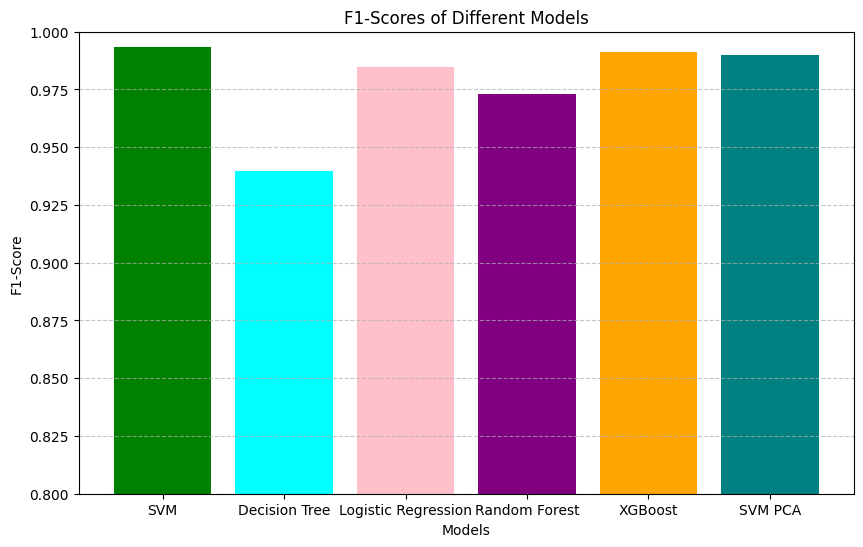

In [ ]:
f1_scores = {
    "SVM": 0.9936,
    "Decision Tree": 0.9395,
    "Logistic Regression": 0.9849,
    "Random Forest": 0.9732,
    "XGBoost": 0.9912,
    "SVM PCA": 0.9898
}

models = list(f1_scores.keys())
scores = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['green', 'cyan', 'pink', 'purple', 'orange', 'teal'])
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.title("F1-Scores of Different Models")
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()